# Covid-19 infección en Ecuador. Modelos probabilisticos
Implementacion de un modelo probabilistico de infección por el virus Covid-19

Se realiza un análisis probabilistico simple del crecimiento de la infección en Python y el modelos para comprender mejor la evolución de la infección.

Se crea modelos de series temporales del número total de personas infectadas hasta la fecha (es decir, las personas realmente infectadas más las personas que han sido infectadas). Estos modelos tienen parámetros , que se estimarán por ajuste de probabilidad.

In [5]:
# Importar las librerias para el analasis
import pandas as pd
import numpy as np
from scipy.integrate import solve_ivp
from scipy.optimize import minimize
from scipy.integrate import odeint
from datetime import datetime,timedelta
from sklearn.metrics import mean_squared_error
from scipy.optimize import curve_fit
from scipy.optimize import fsolve
from sklearn import linear_model
import matplotlib.pyplot as plt
%matplotlib inline


In [7]:
# Actualizar los datos (URL)
url = 'https://covid.ourworldindata.org/data/ecdc/new_cases.csv'
df = pd.read_csv(url)
df = df.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
# Expresar las fechas en numero de dias desde el 01 Enero
df = df[df['date'] >= '2020-03-01']
FMT = '%Y-%m-%d'
date = df['date']
df['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df

date  Ecuador
61     60      1.0
62     61      5.0
63     62      1.0
64     63      NaN
65     64      3.0
66     65      3.0
67     66      NaN
68     67      NaN
69     68      1.0
70     69      1.0
71     70      2.0
72     71      NaN
73     72      NaN
74     73      6.0
75     74      5.0
76     75      9.0
77     76     21.0
78     77     53.0
79     78     57.0
80     79     31.0
81     80    227.0
82     81    106.0
83     82    257.0
84     83    192.0
85     84    101.0
86     85    129.0
87     86    192.0
88     87    224.0
89     88    208.0
90     89     55.0
91     90     76.0
92     91    336.0
93     92    456.0
94     93    405.0
95     94    205.0
96     95     97.0
97     96    181.0
98     97    101.0
99     98    248.0
100    99    455.0
101   100    515.0
102   101   2196.0
103   102     96.0
104   103    209.0
105   104     63.0
106   105     74.0
107   106    255.0
108   107    367.0
109   108    225.0
110   109    572.0
111   110    446.0
112   111    660.0
113   112    270.0

Imprimos los resultados y agregamos el numero del dia


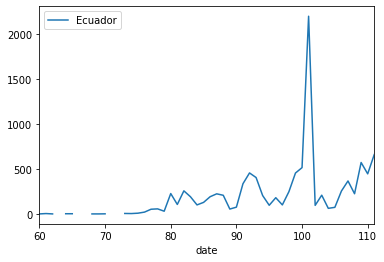

In [220]:
df.plot(x ='date', y='Ecuador')

Ahora podemos analizar un modelo probabilisto para el examen.

## El modelo basado en probabilidad

Para realizar un estimacion del factor de crecimiento de los casos de Covid 19 en Ecuador calculamos la mediana, con esto obtenemo el valor medio de crecimiento de un conjunto de datos, con esto podemos obtener un factor de crecimiento o taza de crecimiento de los nuevos casos.



In [221]:
filtro = df["Ecuador"][0:] # Filtro los datos que se empezo a tener casos
#Obtenemos la mediana
media = filtro.mean()
mediana = filtro.median()
print(mediana)
print(media)


106.0
215.48936170212767


De la ecuación de la recta y = mX + b nuestra pendiente «m» es el coeficiente y el término independiente «b»


In [245]:
#Vamos a comprobar:
# según la media y la mediana podemos obtener la taza de crecieminto y predicir su comportamiento.
# Cargamos los datos de total de casos
url = 'https://covid.ourworldindata.org/data/ecdc/total_cases.csv'
df_t = pd.read_csv(url)
FMT = '%Y-%m-%d'
date = df_t['date']
df_t['date'] = date.map(lambda x : (datetime.strptime(x, FMT) - datetime.strptime("2020-01-01", FMT)).days)
df_t = df_t.loc[:,['date','Ecuador']] #Selecciono las columnas de analasis
df_t = df_t[df_t['date'] > 59]
df_t['Ecuador'] = df['Ecuador'].fillna(0)
x = list(df_t.iloc [:, 0]) # Dias
y = list(df_t.iloc [:, 1]) # Total casos
#Realizamos un ejemplo de prediccion
prediccion_siguiente = int(y[-1] + mediana)
print(prediccion_siguiente)
aux = len(x)

766


52


Text(0.5, 1.0, 'Modelo probabilístico')

<Figure size 432x288 with 0 Axes>

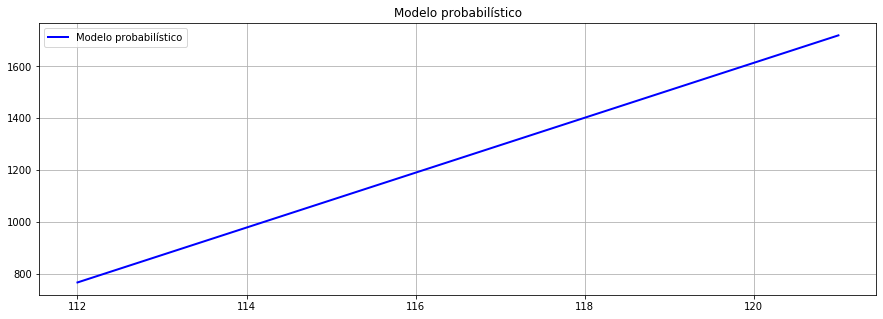

In [246]:
# Quiero predecir cuántos "Casos" voy a obtener de aqui a 10 dias.
print(aux)
for i in range(x[-1]+1, x[-1]+11):
    x.append(i)
    y.append(int(y[-1] + mediana))
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(x[aux:], y[aux:],'b', alpha=1, lw = 2, label = 'Modelo probabilístico')
ax.grid()
ax.legend()
ax.set_title("Modelo probabilístico")

# Practica

1. Comparar el modelo de predicion matematico vs probabilidad.
2. Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales. Solo cargan los datos para generar los modelos menos 7 dias.

Puntos extras: Investigas sobre la correlacion de variables y aplicar el calculo en base a los datos del Ecuador.

Ecuación polinomial de grado:  6  
************************************************
            6             5          4         3        2
-1.467e-06 x + 0.0008151 x - 0.1855 x + 22.16 x - 1465 x + 5.085e+04 x - 7.242e+05
************************************************


<Figure size 432x288 with 0 Axes>

<Figure size 432x288 with 0 Axes>

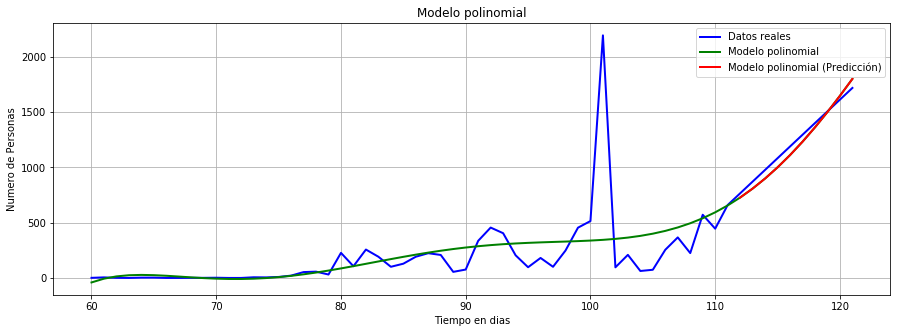

In [247]:
# Implementar
#                             1. Comparar el modelo de predicción matemático vs probabilístico:
# Modelo probabilístico
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111, axisbelow=True)
ax.plot(x[:len(x)-9], y[:len(x)-9],'b', alpha=1, lw = 2, label = 'Datos reales')
ax.plot(x[len(x)-10:], y[len(x)-10:],'r', alpha=1, lw = 2, label = 'Modelo probabilístico (predicción)')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_title("Modelo probabilístico")
ax.legend()
ax.grid()
x_matematico = x[:]
y_matematico = y[:]

# Modelo polinomial
grado = 6
modeloPol = pd.DataFrame(columns=('Días', 'Modelo Polinomial'))
y_polinomial = np.poly1d(np.polyfit(x_matematico,y_matematico,grado))

# Asignación de valores a la variable dependiente según la ecuación anterior
for pred in x_matematico:
    modeloPol.loc[len(modeloPol)] = [pred, y_polinomial(pred)]
# Gráfico del modelo polinomial de grado n
print("Pacientes fallecidos: ",datos_dia.loc[0, 'Pacientes']-datos_dia.loc[0, 'Hospitalizados'])
print("Ecuación polinomial de grado: ",grado," ")
print("************************************************")
print(y_polinomial)
print("************************************************")

0.4272902462799853 0.15607172617311535


<Figure size 432x288 with 0 Axes>

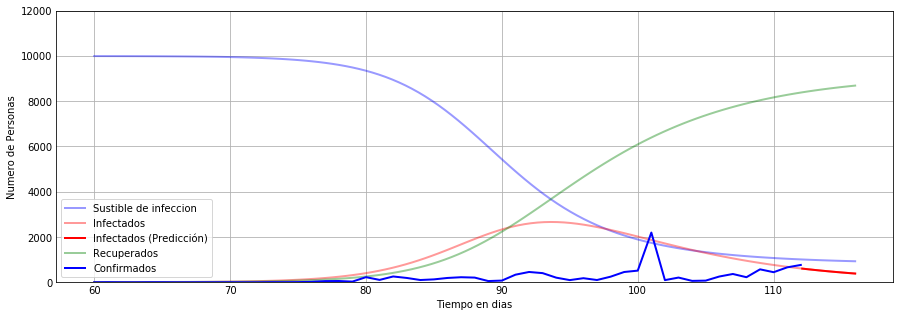

In [248]:
# 2.Generar el SIR en base al modelo de probabilidad y obtener beta y gamma con una semana de prediccion.
# Aproximación de casos para la siguiente semana (29 de Abril~116 días)

# Las ecuaciones diferenciales del modelo SIR..
def deriv(y, t, beta, gamma):
    S, I, R = y
    dSdt = -beta * S * I / N 
    dIdt = beta * S * I / N - gamma * I
    dRdt = gamma * I
    return dSdt, dIdt, dRdt

def loss(point, confirmados, S0, I0, R0):
    size = len(confirmados)
    beta, gamma = point
    def SIR(t, y):
        S = y[0]
        I = y[1]
        R = y[2]
        return [-beta*S*I, beta*S*I-gamma*I, gamma*I]
    solution = solve_ivp(SIR, [0, size], [S0, I0, R0], t_eval=np.arange(0, size, 1), vectorized=True)
    return np.sqrt(np.mean((solution.y[1] - confirmados)**2))

#Numero habitantes del Ecuador
N=10000
#casos confirmados
I0=2
#Recuperados
R0=10
#Resto de la poblacion
S0= N - I0 - R0

# Todos los demás, S0, son susceptibles a la infección inicialmente.
S0 = N - I0 - R0

x_confirmados = x[:]

y = y[:]

# Estimar beta y gamma con los casos confirmados
optimal = minimize(loss,[0.001, 0.001],args=(y, S0, I0, R0),
                   method='L-BFGS-B',bounds=[(0.00000001, 0.4), (0.00000001, 0.4)]
                  )

beta, gamma = optimal.x
beta = beta*15000
t = np.linspace(60, 116, 116)

# Vector de condiciones iniciales
y0 = S0, I0, R0

ret = odeint(deriv, y0, t, args=(beta, gamma))
S, I, R = ret.T # Obtenicion de resultados

fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15, 5))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(t, S, 'b', alpha = 0.4, lw=2, label='Sustible de infeccion')
ax.plot(t, I, 'r', alpha = 0.4, lw=2, label='Infectados')
ax.plot(t[len(t)-9:], I[len(I)-9:], 'r', alpha = 1, lw=2, label='Infectados (Predicción)')
ax.plot(t, R, 'g', alpha = 0.4, lw=2, label='Recuperados')
ax.plot(x_confirmados[:len(x_confirmados)-9], y[:len(y)-9], 'b',lw=2, label = 'Confirmados')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.set_ylim(0,N*1.2)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid()
ax.legend()
print(beta, gamma)

<Figure size 432x288 with 0 Axes>

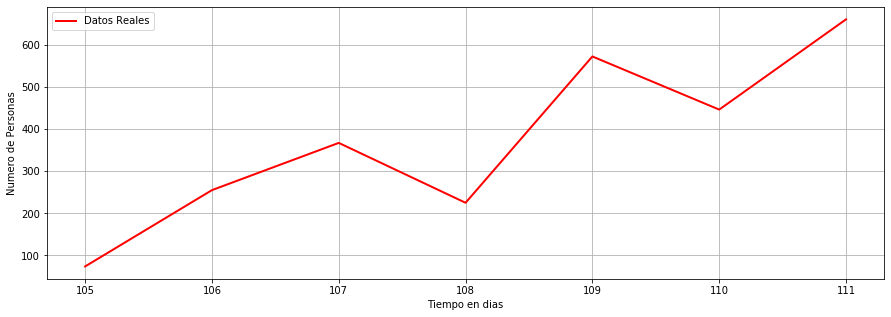

<Figure size 432x288 with 0 Axes>

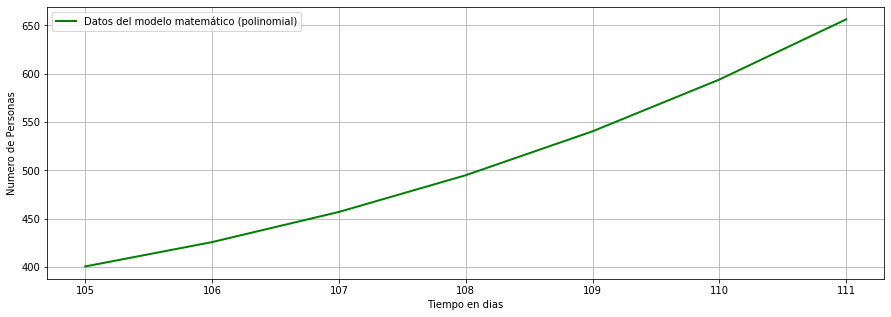

<Figure size 432x288 with 0 Axes>

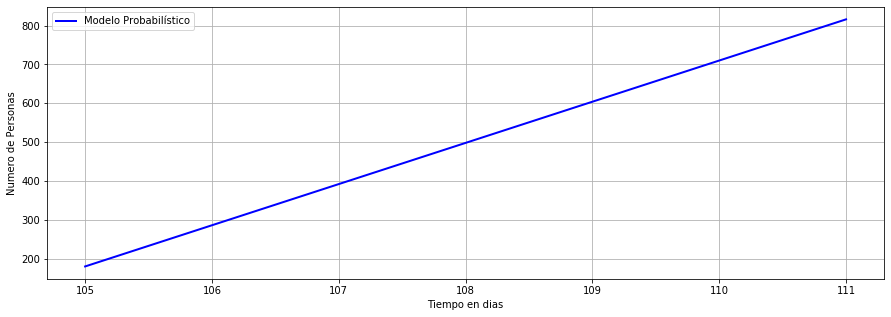

In [249]:
# 3. Retroceder un semana y comparar el modelo matematico vs probabilidad vs reales.
#    Solo cargan los datos para generar los modelos menos 7 dias.
# Datos de hace una semana (Abril 14 a Abril 21)
x_Reales_Historicos = x[len(x)-17:len(x)-10]
y_Reales_Historicos = y[len(y)-17:len(y)-10]
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x_Reales_Historicos, y_Reales_Historicos,'r',lw=2, label='Datos Reales')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.legend()
ax.grid()

# Gráfica del modelo matemático (polinomial)
fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(modeloPol.iloc[len(modeloPol)-17:len(modeloPol)-10,0],
        modeloPol.iloc[len(modeloPol)-17:len(modeloPol)-10,1],'g',lw=2, label='Datos del modelo matemático (polinomial)')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.legend()
ax.grid()

# Gráfica del modelo probabilístico
# Obtención de datos desde hace una semana a la fecha mediante la adición de la media
aux = y[len(x)-17]
for i in range(len(x)-17, len(x)-10):
    y[i] = (int(aux + mediana))
    aux = y[i]

fig = plt.figure(facecolor='w')
fig = plt.figure(figsize=(15,5))
ax = fig.add_subplot(111,  axisbelow=True)
ax.plot(x[len(x)-17:len(x)-10],y[len(y)-17:len(y)-10],'b',lw=2, label='Modelo Probabilístico')
ax.set_xlabel('Tiempo en dias')
ax.set_ylabel('Numero de Personas')
ax.legend()
ax.grid()

## Analisis
Los datos que se puede obtener acerca de un fenómeno permiten realizar aproximaciones de distintos tipos para predecir lo que podrá ocurrir en el futuro, como es el presente caso en el que tenemos distintas predicciones pero ninguna de ellas se aleja demasiado del valor real.
## Conclusiones
Para analizar el comportamiento de un fenómeno en el mundo real se necesita tomar diferentes enfoques y utilizar diferentes herramientas, ya que una predicción puede estar errada pero si obtenemos una coincidencia o aproximación entre los resultados de dos herramientas distintas, se puede predecir con mayor precisión el evento que ocurrirá a continuación.
## Criterio personal (politico, economico y  social de la situacion)
En cuanto a lo político, no se necesita un mandatario en esta situación, la conciencia individual y colectiva es lo que nos permitirá actuar con cautela y reducir los efectos negativos de la pandemia que vivimos, económicamente, la sociedad enfrentará un problema muy grande y para reactivarla se necesitará de la ayuda de todos los seres humanos que vivimos y somos suceptibles a este agravio global, socialmente, existen y existirán personas aisladas que deberán esperar a recuperarse antes de reintegrarse a la sociedad, y la mejor opción sería diseñar un plan para concientizar a las personas de las consecuencias y las mejores acciones que se pueden tomar durante esta crisis.

# Referencias

- https://www.researchgate.net/publication/340092755_Infeccion_del_Covid-19_en_Colombia_Una_comparacion_de_modelos_logisticos_y_exponenciales_aplicados_a_la_infeccion_por_el_virus_en_Colombia

- https://www.aprendemachinelearning.com/regresion-lineal-en-espanol-con-python/